In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

### Import/Read Dataset

In [5]:
wine_data = load_wine()

In [11]:
wine_df = pd.DataFrame(data = wine_data.data, columns = wine_data.feature_names)
wine_df['Target'] = wine_data.target

In [12]:
wine_df['Target']

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: Target, Length: 178, dtype: int64

#### Data Understanding

In [15]:
print(wine_data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [16]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  Targe

### Model Building

In [17]:
x = wine_df.drop('Target',axis =1)
y = wine_df['Target']

In [20]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.20,random_state=12)

In [23]:
knn_model = KNeighborsClassifier(n_neighbors=3)

In [24]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

### Model Tesing and Evaluation

In [25]:
y_pred = knn_model.predict(x_test)

In [26]:
accuracy_score(y_test,y_pred)

0.9722222222222222

In [27]:
x_train_unscaled,x_test_unscaled,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=12)

In [28]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train_unscaled,y_train)
y_pred = knn_model.predict(x_test_unscaled)
accuracy_score(y_test,y_pred)

0.6944444444444444

In [29]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(x_train_unscaled,y_train)
y_pred = knn_model.predict(x_test_unscaled)
accuracy_score(y_test,y_pred)

0.6944444444444444

### Finding Best K-Value

In [37]:
neighbours = list(range(1,51))
cv_score = []

for i in neighbours:
    knn_model = KNeighborsClassifier(n_neighbors=i)
    cv_scores = cross_val_score(estimator=knn_model,X=x_train,y = y_train)
    cv_score.append(cv_scores.mean())
    

In [40]:
cv_score.index(max(cv_score))+1

28

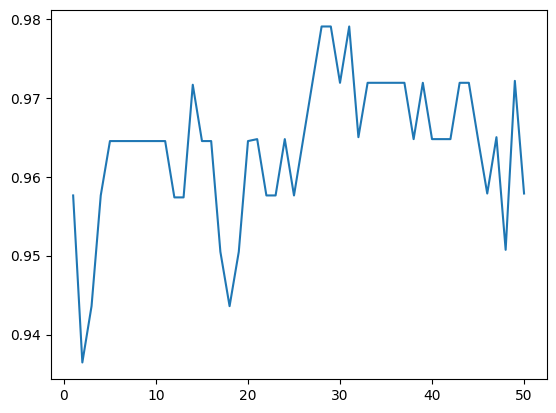

In [42]:
plt.plot(neighbours,cv_score)

In [45]:
knn_model = KNeighborsClassifier(n_neighbors=28)
knn_model.fit(x_train,y_train)
y_pred = knn_model.predict(x_test)
accuracy_score(y_test,y_pred)

0.9722222222222222

In [46]:
knn_model = KNeighborsClassifier(n_neighbors=29)
knn_model.fit(x_train,y_train)
y_pred = knn_model.predict(x_test)
accuracy_score(y_test,y_pred)

0.9444444444444444